In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## DATA FROM KAGGLE

In [43]:
train_data = pd.read_csv("train.csv", delimiter=",")

### Training data size

In [76]:
print(len(train_data),  "instances")

2400 instances


### Columns in train data

In [28]:
cols = pd.DataFrame(train_data.dtypes)
cols

,0
id,int64
spacegroup,int64
number_of_total_atoms,float64
percent_atom_al,float64
percent_atom_ga,float64
percent_atom_in,float64
lattice_vector_1_ang,float64
lattice_vector_2_ang,float64
lattice_vector_3_ang,float64
lattice_angle_alpha_degree,float64


### Histogram of values

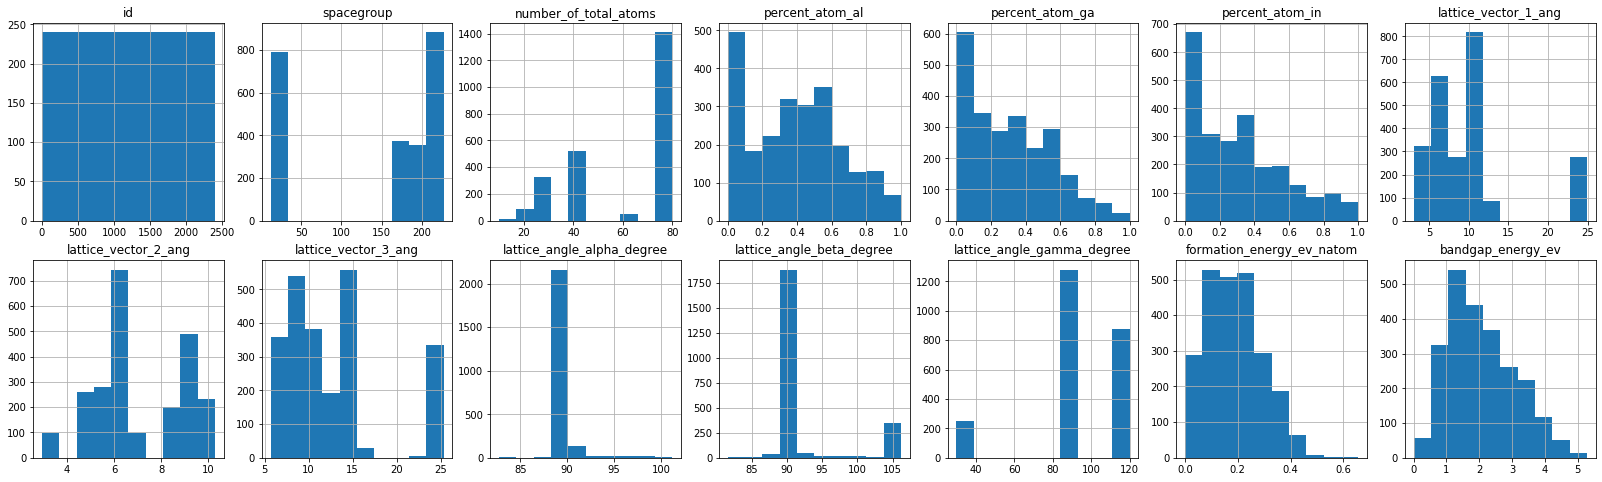

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(28,8))
for col, ax_i in zip(train_data.columns, ax.flatten()):
    train_data[col].hist(ax=ax_i)
    ax_i.set_title(col)
plt.show()

**We can drop id because it contains no useful information for us**

In [45]:
train_data = train_data.drop("id", axis=1)

### Correlations between values

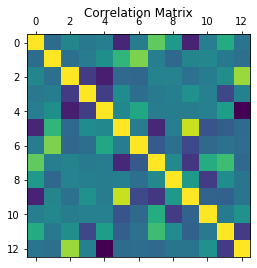

In [48]:
plt.matshow(train_data.corr())
plt.title("Correlation Matrix")
plt.show()

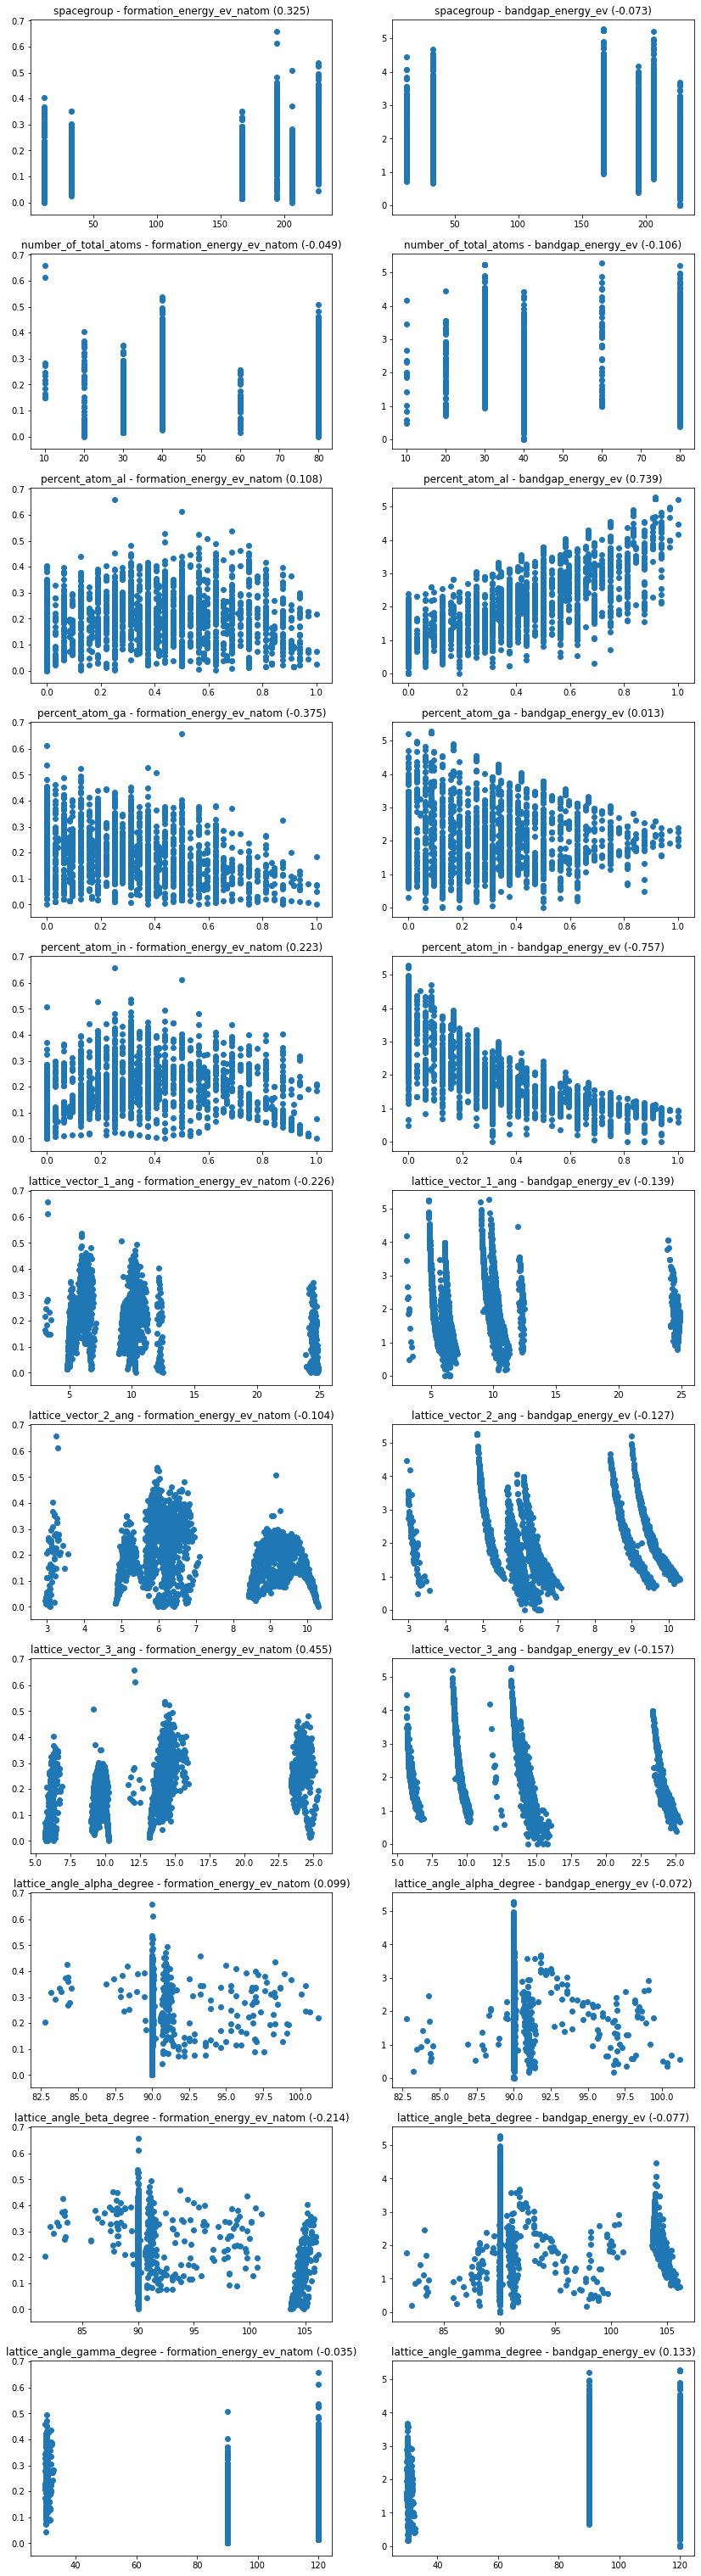

In [69]:
fig, ax = plt.subplots(nrows=11, ncols=2, figsize=(14,55))
for col, ax_i in zip(train_data.columns[:-2], ax):
    ax_i[0].scatter(train_data[col], train_data["formation_energy_ev_natom"])
    ax_i[1].scatter(train_data[col], train_data["bandgap_energy_ev"])
    ax_i[0].set_title(col + " - formation_energy_ev_natom (" +  str(round(train_data[col].corr(train_data['formation_energy_ev_natom']), 3)) + ")")
    ax_i[1].set_title(col + " - bandgap_energy_ev (" +  str(round(train_data[col].corr(train_data['bandgap_energy_ev']), 3)) + ")" )

In [78]:
from sklearn.model_selection import train_test_split
X = train_data.drop(["formation_energy_ev_natom", "bandgap_energy_ev"], axis=1)
y_fe = train_data.formation_energy_ev_natom
y_be = train_data.bandgap_energy_ev
X_tr, X_te, y_fe_tr, y_fe_te, y_be_tr, y_be_te = train_test_split(X, y_fe, y_be, test_size=0.1)

In [82]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100).fit(X_tr, y_fe_tr)
#  root mean squared logarithmic error is used for evaluation
print("train error:", rmsle(y_fe_tr, rfr.predict(X_tr)))
print("test error:", rmsle(y_fe_te, rfr.predict(X_te)) )

train error: 0.020436426546947908
test error: 0.039064285475081575


In [86]:
pd.DataFrame([rfr.feature_importances_

array([0.02774319, 0.0035624 , 0.12932906, 0.06645898, 0.20694635,
       0.03819447, 0.0781019 , 0.3726538 , 0.03093058, 0.03140796,
       0.01467132])

## CONSTRUCTED FEATURES